<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from google.colab import files
uploaded=files.upload()

Saving TweetSent.csv to TweetSent.csv


In [0]:
df = pd.read_csv("TweetSent.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 2 columns):
Tweet       5968 non-null object
Category    5968 non-null object
dtypes: object(2)
memory usage: 93.3+ KB


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

11936

(5968, 2)

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


,Tweet,Category
5963,"Ok ed let's do this, Zlatan, greizmann and Lap...",positive
5964,Goal level: Zlatan 90k by Friday? = Posting e...,neutral
5965,@YouAreMyArsenal Wouldn't surprise me if we en...,neutral
5966,Rib injury for Zlatan against Russia is a big ...,neutral
5967,Noooooo! I was hoping to see Zlatan being Zlat...,neutral


In [0]:
df.Category.value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

In [0]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


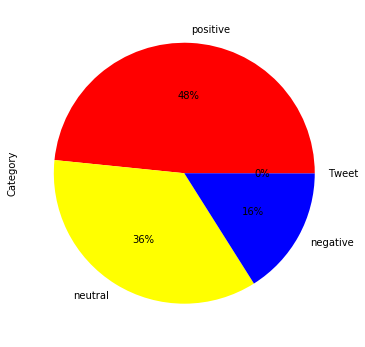

In [0]:
df.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow","blue"])


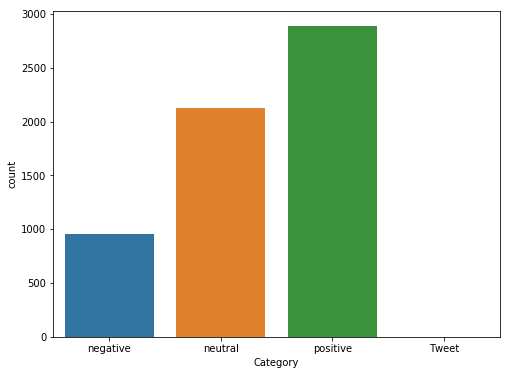

In [0]:
sns.countplot(x = 'Category',data=df)


Text(0.5, 1.0, 'Positive Tweets')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Negative Tweets')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Neutral Tweets')

(-0.5, 399.5, 199.5, -0.5)

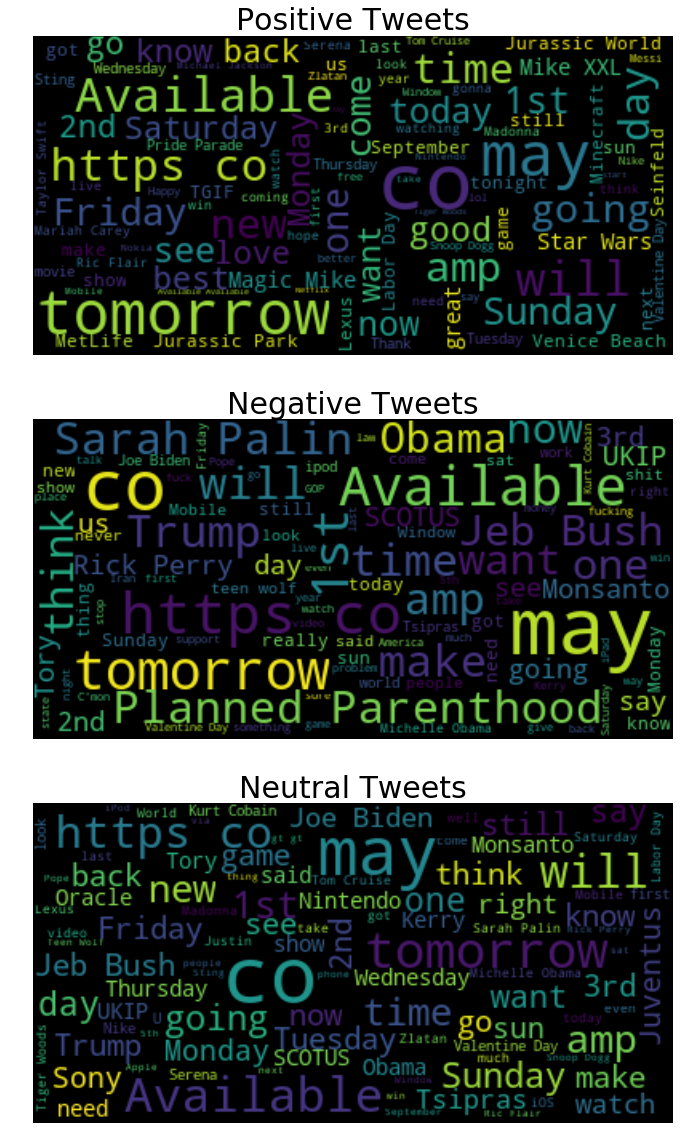

In [0]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_positive=df[df['Category'] == 'positive']
df_negative=df[df['Category']=='negative']
df_neutral=df[df['Category']=='neutral']
tweet_all=" ".join(review for review in df.Tweet)
tweet_positive=" ".join(review for review in df_positive.Tweet)
tweet_negative=" ".join(review for review in df_negative.Tweet)
tweet_neutral=" ".join(review for review in df_neutral.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (20,20))
# Create and generate a word cloud image:
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_negative)
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_neutral)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neutral, interpolation='bilinear')
ax[2].set_title('Neutral Tweets',fontsize=30)
ax[2].axis('off')

In [0]:
tweets_text = []
f_in = open("TweetSent.csv",'r')
for line in f_in.readlines():
    tweets_text.append(line)
f_in.close()

In [0]:
corpus = [] #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
for i in range(0,1000):
  #removes handles (@), numbers, urls emojis and any other special charcters to have only text
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',tweets_text[i])
  # Convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # Split sentences in to words
  tweets_text_cln = tweets_text_cln.split()
  # Remove english stopwords
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # Lemmatize words to the base form
  wn = nltk.WordNetLemmatizer()
  tweets_text_cln = [wn.lemmatize(x) for x in tweets_text_cln]
  # Join words to form the original sentence, but cleaned-up
  tweets_text_cln = " ".join(tweets_text_cln)
  #Append to the list to get all the tweets in one place
  corpus.append(tweets_text_cln)

In [0]:

#Clean Corpus
corpus[0:5]

['tweet category',
 'available negative',
 'io app transport security mm need check rd party network pod support',
 'mar io device download app',
 'vanagon phone run latest io may account problem day time replaced negative']

In [0]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (df):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list

[['tweet'], ['category']]

In [0]:
bagofwords = []
for i in range(0,1000):
  words = corpus[i].split()
  bagofwords.append(words)

In [0]:

bagofwords[5]

['sure',
 'start',
 'publication',
 'io',
 'live',
 'helping',
 'ask',
 'anything',
 'session',
 'today',
 'friday']

In [0]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['tweet', 'category', 'available', 'negative', 'io', 'app', 'transport', 'security', 'mm', 'need']

Most commonly occuring words and frequency



[('positive', 376),
 ('neutral', 244),
 ('jurassic', 192),
 ('may', 170),
 ('tomorrow', 167),
 ('th', 129),
 ('negative', 126),
 ('iphone', 114),
 ('biden', 112),
 ('world', 110),
 ('bush', 109),
 ('joe', 105),
 ('jeb', 104),
 ('available', 102),
 ('io', 100),
 ('ipod', 98),
 ('park', 98),
 ('ipad', 97),
 ('z', 92),
 ('jay', 92)]

In [0]:
words_to_remove=['if','an','z','io','th','jeb','positive','neutral','negative','st','see','get','amp','rd','mm','check']

In [0]:
new_bagofwords = [[x for x in word if not x in words_to_remove] for word in bagofwords]


In [0]:
all_words=list(itertools.chain(*new_bagofwords))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(10)

['tweet', 'category', 'available', 'app', 'transport', 'security', 'need', 'party', 'network', 'pod']

Most commonly occuring words and frequency



[('jurassic', 192),
 ('may', 170),
 ('tomorrow', 167),
 ('iphone', 114),
 ('biden', 112),
 ('world', 110),
 ('bush', 109),
 ('joe', 105),
 ('available', 102),
 ('ipod', 98)]

In [0]:

freq_word_df = pd.DataFrame(words_freq.most_common(15), columns=['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,jurassic,192
1,may,170
2,tomorrow,167
3,iphone,114
4,biden,112


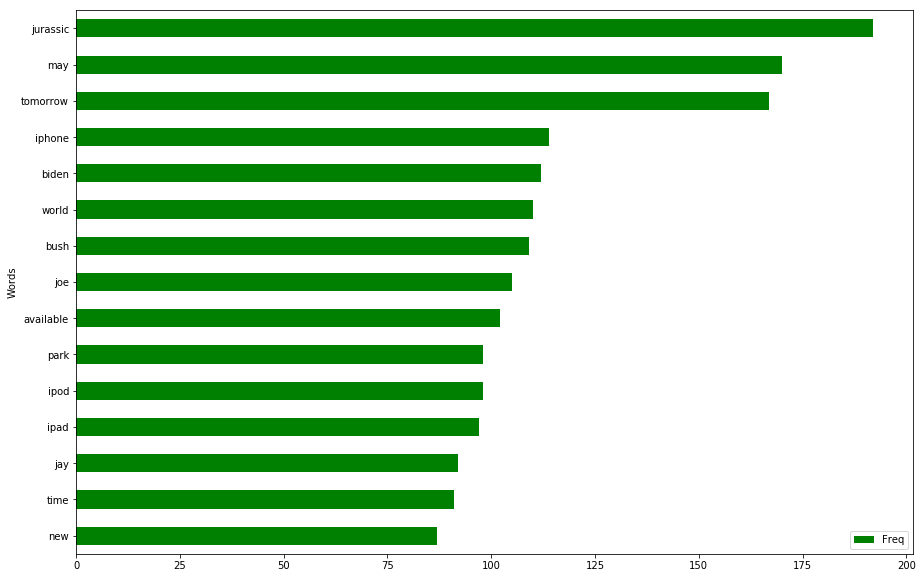

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y = 'Freq', ax=ax, color = "green")
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string= " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                          background_color='black',
                      max_words=20
                         ).generate(word_string)

<Figure size 1080x1440 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

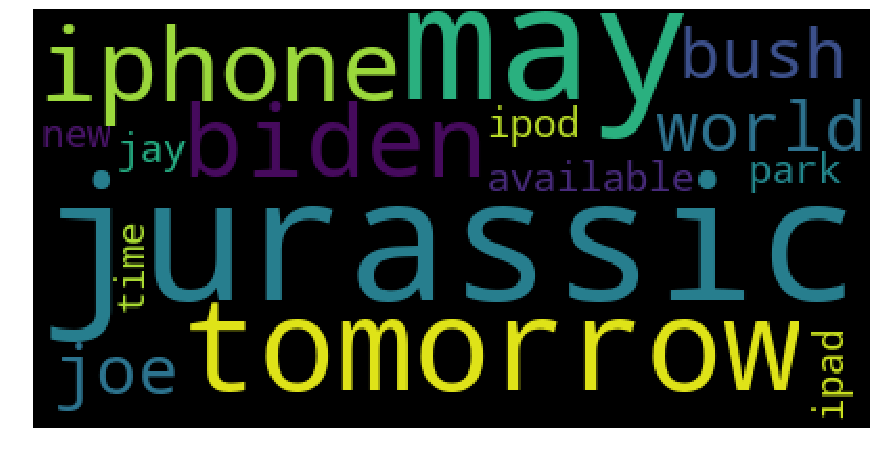

In [0]:
plt.figure(figsize=(15,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:

text_sentiment = [TextBlob(tweet) for tweet in corpus]
print(text_sentiment[5].polarity)
print(text_sentiment[5])

0.3181818181818182
sure start publication io live helping ask anything session today friday


In [0]:
sentiments = [[tweet.sentiment.polarity, str(tweet)] for tweet in text_sentiment]
sentiment_df = pd.DataFrame(sentiments, columns = ["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by= 'Polarity', ascending=False)

,Polarity,Tweet_Text
464,1.000000,know recited jay z may beat best reply
399,1.000000,become st footballer sport owned legendary rap...
663,1.000000,biden presidential bid depends best family was...
634,0.800000,welcome veep joe biden kicking two day visit s...
615,0.800000,happy friday joe biden making cameo episode wo...
985,0.800000,justin funeral tomorrow pleasure known worked ...
841,0.750000,jurassic world excellent way could better kare...
991,0.742424,best jersey season order choose best juventus ...
732,0.709091,ended st fringe experience jurassic park thank...
589,0.700000,let honest joe biden would win may even ask wa...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d4d4b4668>],
      dtype=object)

<function matplotlib.pyplot.title>

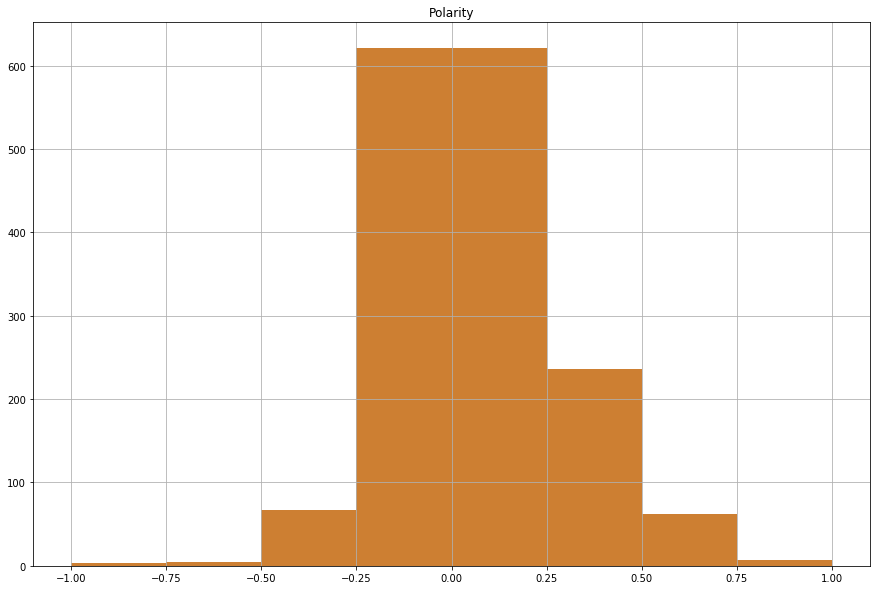

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
#Plot the histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color = '#CD7F32')
plt.title

In [0]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list

[['tweet', 'category'],
 ['available', 'negative'],
 ['io',
  'app',
  'transport',
  'security',
  'mm',
  'need',
  'check',
  'rd',
  'party',
  'network',
  'pod',
  'support'],
 ['mar', 'io', 'device', 'download', 'app'],
 ['vanagon',
  'phone',
  'run',
  'latest',
  'io',
  'may',
  'account',
  'problem',
  'day',
  'time',
  'replaced',
  'negative'],
 ['sure',
  'start',
  'publication',
  'io',
  'live',
  'helping',
  'ask',
  'anything',
  'session',
  'today',
  'friday'],
 ['two',
  'dollar',
  'tuesday',
  'forklift',
  'quickkey',
  'io',
  'suite',
  'page',
  'today'],
 ['already', 'signed', 'test', 'io', 'game', 'now', 'chance'],
 ['youtube',
  'gaming',
  'officially',
  'launch',
  'web',
  'android',
  'io',
  'august',
  'youtube',
  'finally',
  'going',
  'r',
  'webseries',
  'neutral'],
 ['youtube',
  'gaming',
  'launch',
  'tomorrow',
  'io',
  'android',
  'apps',
  'go',
  'head',
  'head',
  'twitch',
  'io',
  'game',
  'neutral'],
 ['yashan',
  'bbc',

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 4.9MB/s 


In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
vader = SentimentIntensityAnalyzer()
def vader_polarity(text):
    """ Transform the output to a binary 0/1 result """
    score = vader.polarity_scores(text)
    return 1 if score['pos'] > score['neg'] else 0
print vader_polarity(train_X[0], train_y[0]) # 0 1
print vader_polarity(train_X[1], train_y[1]) # 0 0
print vader_polarity(train_X[2], train_y[2] )# 1 1
print vader_polarity(train_X[3], train_y[3] )# 0 1
print vader_polarity(train_X[4], train_y[4] )# 0 0
 
pred_y = [vader_polarity(text) for text in test_X]
print accuracy_score(test_y, pred_y) # 0.6892

SyntaxError: ignored